### Read csv and initialize functions and plot

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV
results_df = pd.read_csv('results.csv')

# Define core configurations
cores = ['Sequential', '2-Core', '3-Core', '4-Core']

# Convert time from nanoseconds to milliseconds
results_df[cores] = results_df[cores] / 1e6

# Function to calculate percentage difference relative to sequential
def calc_percentage_diff(row, col):
    if col == 'Sequential':
        return 0  # Return 0 for Sequential since it's the baseline
    else:
        return ((row['Sequential'] - row[col]) / row['Sequential']) * 100 
    
# Initialize the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
plt.close(fig)

### Calculate percentages and input data into graph, while outputting exact figures

In [3]:
# Loop over each subplot and matrix type (2D, 3D)
for ax, dtype in zip(axs, ['2D', '3D']):

    # Iterate over unique dimensions for the current matrix type
    for dimension in results_df[results_df['Type'] == dtype]['Dimension'].unique():

        # Filter data for the current type and dimension
        data_current = results_df[(results_df['Type'] == dtype) & (results_df['Dimension'] == dimension)]

        # Proceed if the filtered data is not empty (for null in 2D 4-core)
        if not data_current.empty:

            # Calculate percentage quicker for each core configuration
            percentages = [calc_percentage_diff(data_current.iloc[0], col) for col in cores]

            # Print percentages for the current type and dimension
            print(f"{dtype} {dimension}x{dimension}" + ("x" + str(dimension) if dtype == "3D" else ""))
            for core, percentage in zip(cores, percentages):
                print(f"{core}: {percentage:.2f}% quicker")
            print()

            # Plot these percentages on the current subplot
            ax.plot(cores, percentages, marker='o', label=f'{dimension}x{dimension}' + ('x' + str(dimension) if dtype == '3D' else ''))

2D 70x70
Sequential: 0.00% quicker
2-Core: 71.69% quicker
3-Core: -27.86% quicker
4-Core: nan% quicker

3D 70x70x70
Sequential: 0.00% quicker
2-Core: 77.91% quicker
3-Core: 63.54% quicker
4-Core: -91.60% quicker



### Edit and display graph

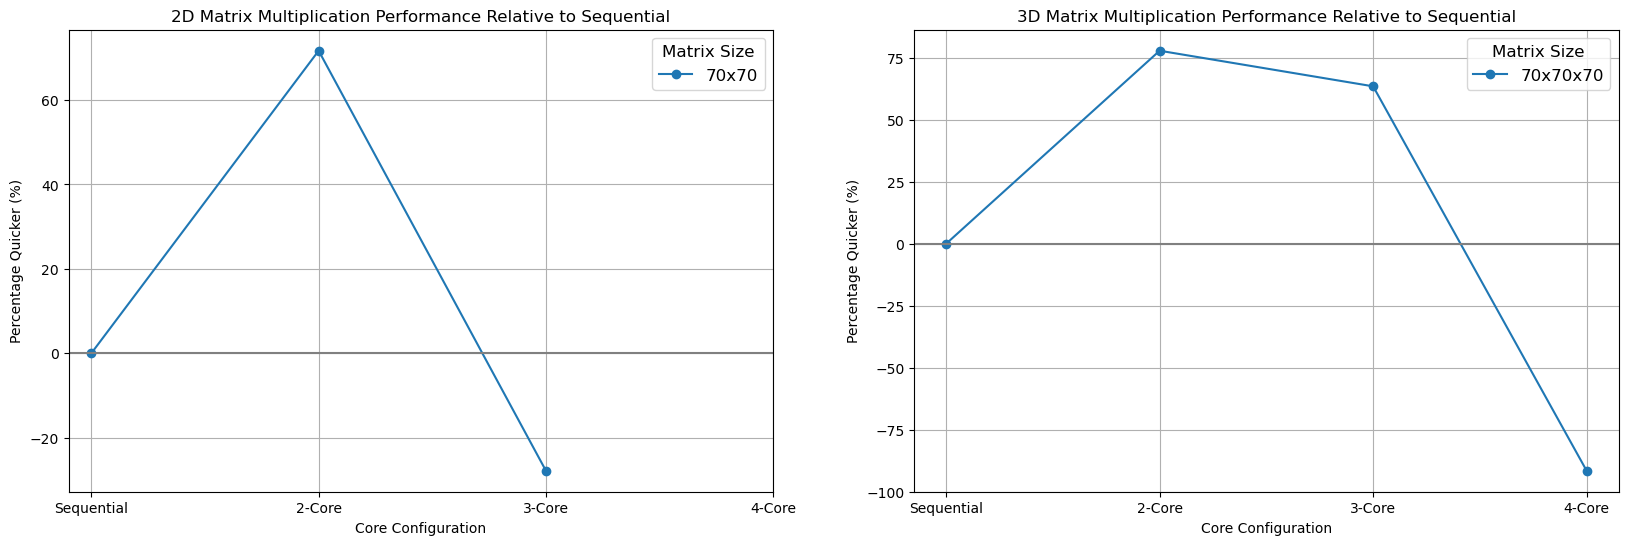

In [4]:
# Configure the subplots
for ax in axs:

    # Add a line at 0% to indicate the baseline
    ax.axhline(0, color='gray', linewidth=1.5)  

    ax.set_xlabel('Core Configuration')
    ax.set_ylabel('Percentage Quicker (%)')
    ax.set_xticks(cores)
    ax.grid(True)
    ax.legend(title="Matrix Size", fontsize='large', title_fontsize='large')

axs[0].set_title('2D Matrix Multiplication Performance Relative to Sequential')
axs[1].set_title('3D Matrix Multiplication Performance Relative to Sequential')

fig